In [ ]:
#%pip install numpy==1.22 --user

In [32]:
import numpy as np
print(np.__version__) # make sure this is 1.22 otherwise tensorflow wont work
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, DirectoryIterator, img_to_array
from keras.utils.vis_utils import plot_model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

1.22.3


In [ ]:
train_dir = './data/train/'
test_dir = './data/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

In [ ]:
train_count.transpose().plot(kind='bar')

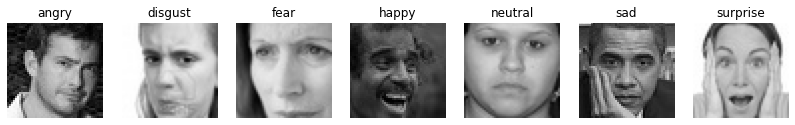

In [4]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [12]:
print(training_set[0][0])

[[[[0.52156866]
   [0.52156866]
   [0.52295893]
   ...
   [0.46711248]
   [0.47058827]
   [0.47058827]]

  [[0.52156866]
   [0.52156866]
   [0.52295893]
   ...
   [0.46711248]
   [0.47058827]
   [0.47058827]]

  [[0.52156866]
   [0.52156866]
   [0.52295893]
   ...
   [0.46711248]
   [0.47058827]
   [0.47058827]]

  ...

  [[0.69411767]
   [0.69411767]
   [0.6989838 ]
   ...
   [0.4004834 ]
   [0.44705886]
   [0.44705886]]

  [[0.69411767]
   [0.69411767]
   [0.6989838 ]
   ...
   [0.4004834 ]
   [0.44705886]
   [0.44705886]]

  [[0.69411767]
   [0.69411767]
   [0.6989838 ]
   ...
   [0.4004834 ]
   [0.44705886]
   [0.44705886]]]


 [[[0.6079103 ]
   [0.80611837]
   [0.9504937 ]
   ...
   [0.7036825 ]
   [0.6856636 ]
   [0.6780565 ]]

  [[0.7726284 ]
   [0.86696124]
   [0.8761423 ]
   ...
   [0.68390965]
   [0.6753377 ]
   [0.66631234]]

  [[0.8133398 ]
   [0.83654827]
   [0.8236222 ]
   ...
   [0.6802321 ]
   [0.6664338 ]
   [0.6569627 ]]

  ...

  [[0.3158058 ]
   [0.19025837]
   [0.2

In [16]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Loop over training set batches
for i in range(len(training_set)):
    # Access images and labels from training set batch
    X_train, y_train = training_set.next()
    
    # Flatten the images for SVM input
    X_train = X_train.reshape(X_train.shape[0], -1)
    
    # Convert one-hot encoded labels to class indices
    y_train_indices = np.argmax(y_train, axis=1)
    
    # Train the SVM model on the batch
    svm_model.fit(X_train, y_train_indices)

# Loop over test set batches
y_true = []
y_pred = []
for i in range(len(test_set)):
    # Access images and labels from test set batch
    X_test, y_test = test_set.next()
    
    # Flatten the images for SVM input
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    # Convert one-hot encoded labels to class indices
    y_test_indices = np.argmax(y_test, axis=1)
    
    # Predict on the batch
    y_pred_batch_indices = svm_model.predict(X_test)
    
    # Append true labels and predicted labels
    y_true.extend(y_test_indices)
    y_pred.extend(y_pred_batch_indices)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.22276400111451658


In [31]:
def get_accuracy(k_method, c_value):
    # Initialize the SVM model
    svm_model = SVC(kernel=k_method, C=c_value, gamma='scale', random_state=42)

    # Loop over training set batches
    for i in range(len(training_set)):
        # Access images and labels from training set batch
        X_train, y_train = training_set.next()

        # Flatten the images for SVM input
        X_train = X_train.reshape(X_train.shape[0], -1)

        # Convert one-hot encoded labels to class indices
        y_train_indices = np.argmax(y_train, axis=1)

        # Train the SVM model on the batch
        svm_model.fit(X_train, y_train_indices)

    # Loop over test set batches
    y_true = []
    y_pred = []
    for i in range(len(test_set)):
        # Access images and labels from test set batch
        X_test, y_test = test_set.next()

        # Flatten the images for SVM input
        X_test = X_test.reshape(X_test.shape[0], -1)

        # Convert one-hot encoded labels to class indices
        y_test_indices = np.argmax(y_test, axis=1)

        # Predict on the batch
        y_pred_batch_indices = svm_model.predict(X_test)

        # Append true labels and predicted labels
        y_true.extend(y_test_indices)
        y_pred.extend(y_pred_batch_indices)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy:', round(accuracy, 5))
    return accuracy


In [ ]:
kernel_methods = ['linear', 'poly', 'rbf']
k = []
acc = []
for i in kernel_methods:
    for j in np.arange(0.01, 1.0, 0.02):
        print("Method:", i, " C: ", round(j, 2), end=' ')
        k.append(i)
        acc.append(get_accuracy(i,j))



Method: linear  C:  0.01 

In [33]:
# Predict the labels for the test set

y_pred = svm_model.predict(test_set)

# Get the true labels for the test set
y_true = test_set.classes

# Get the class names from the class indices
class_names = list(training_set.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names,
       yticklabels=class_names,
       title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label')

# Add labels to the plot
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\henry\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\henry\anaconda3\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "C:\Users\henry\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 156, in __next__
    return self.next(*args, **kwargs)
  File "C:\Users\henry\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 168, in next
    return self._get_batches_of_transformed_samples(index_array)
  File "C:\Users\henry\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 377, in _get_batches_of_transformed_samples
    x = image_utils.img_to_array(img, data_format=self.data_format)
  File "C:\Users\henry\anaconda3\lib\site-packages\keras\utils\image_utils.py", line 324, in img_to_array
  

TypeError: object of type 'NoneType' has no len()